In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

Let's read the data from csv file

In [2]:
df= pd.read_excel('Google_sample2.xlsx',usecols='A,C,D',index=False)
df.head()

,Respondent.Serial,C1[1].slice,True_False
0,1,플레이스토어,1
1,2,구글플레이,1
2,3,구글앱스토어,1
3,4,구글플레이,1
4,5,앱스토어,1


In [3]:
df.columns =['ID','C1','label']
df

,ID,C1,label
0,1,플레이스토어,1
1,2,구글플레이,1
2,3,구글앱스토어,1
3,4,구글플레이,1
4,5,앱스토어,1
...,...,...,...
27902,27903,KOF,0
27903,27904,rtefhfgh,0
27904,27905,djqtdma,0
27905,27906,ad,0


Let's look into our data

In [4]:
df.groupby('label').size()

label
0      286
1    27621
dtype: int64

In [5]:
print(df.isnull().sum())

ID       0
C1       0
label    0
dtype: int64


Now let's create new feature "message length" and plot it to see if it's of any interest

In [6]:
#응답에 숫자도 있어서 int 형으로 생각함 -> 문자형으로 변환
df['C1'] = df['C1'].apply(str)

In [7]:
# df['length'] = df['C1'].str.len()
df['length'] = df['C1'].apply(len)
df.head()

,ID,C1,label,length
0,1,플레이스토어,1,6
1,2,구글플레이,1,5
2,3,구글앱스토어,1,6
3,4,구글플레이,1,5
4,5,앱스토어,1,4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000258F52D5BC8>,
      dtype=object)

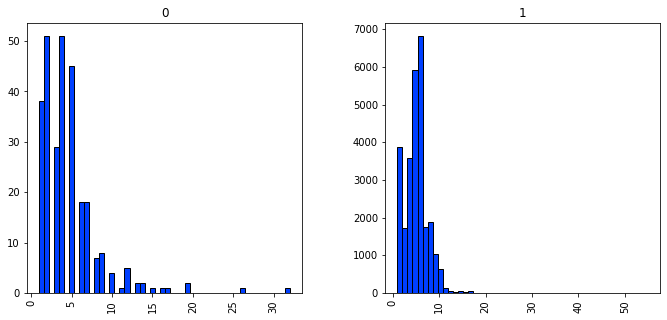

In [8]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df.hist(column='length', by='label', bins=50,figsize=(11,5))

Looks like the lengthy is the message, more likely it is a spam. Let's not forget this

### Text processing and vectorizing our meddages

Let's create new data frame. We'll need a copy later on

In [9]:
text_feat = df['C1'].copy()

Now define our tex precessing function. It will remove any punctuation and stopwords aswell.

In [10]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words()]
    
    return " ".join(text)

In [11]:
#처음 다운로드할때만
# import nltk
# nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 0] Error>


False

In [ ]:
text_feat = text_feat.apply(text_process)

In [13]:
# text_feat = text_feat.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# text_feat=text_feat.dropna(how = 'any') 
# print(text_feat.isnull().values.any()) 


# #한국어니까...영어는 삭제돼서 NULL로 됨.

# Null 값이 존재하는 행 제거.... 제거해야할까?? 
#삭제할경우 -> 불용어 처리를 하다보면 NULL값이 될 수 있는데 불량응답을 나중에 걸러낼 수 있을까? 
#삭제를 안할경우 -> Null 값도 불량응답으로 훈련할텐데 전체베이스가 아닌 오픈문항에서 비포함 케이스도 불량응답으로 처리하지 않을까?

In [13]:
#벡터화
vectorizer = TfidfVectorizer()

In [11]:
# #TfidfVectorizer()
# 등장횟수도 많고 문서 분별력 있는 단어들을 스코어링한 것

# #장점
# 선택된 단어는 TF-IDF 스코어를 가지며 어떤 단어가 중요한 단어인지 직관적으로 해석이 가능하며, 
# 전처리(pos-of-tagging)가 잘 수행 되었을때 다른 변수선택/추출보다 견줄만한 성능을 가지고 있다.

# #단점
# 제외된 단어들은 학습에 사용되지 않기 때문에 새로운 단어에 대한 해석이 불가능 
# 순서를 고려하지 않기 때문에 어순에 대한 문법적인 의미를 담고 있지 않는다.

In [14]:
features = vectorizer.fit_transform(text_feat)

###  Classifiers and predictions

First of all let's split our features to test and train set

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.3, random_state=111)

Now let's import bunch of classifiers, initialize them and make a dictionary to itereate through

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [17]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

Parametres are based on notebook:
[Spam detection Classifiers hyperparameter tuning][1]


  [1]: https://www.kaggle.com/muzzzdy/d/uciml/sms-spam-collection-dataset/spam-detection-classifiers-hyperparameter-tuning/

In [18]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

Let's make functions to fit our classifiers and make predictions

In [19]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [20]:
def predict_labels(clf, features):
    return (clf.predict(features))

Now iterate through classifiers and save the results

In [21]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [22]:
# 오류 : DataFrame.from_items
# df = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
score=pd.DataFrame.from_dict(dict(pred_scores),orient='index',columns=['Score'])
score


,Score
SVC,0.990207
KN,0.988176
NB,0.987937
DT,0.990445
LR,0.989968
RF,0.990207
AdaBoost,0.990207
BgC,0.990445
ETC,0.990445


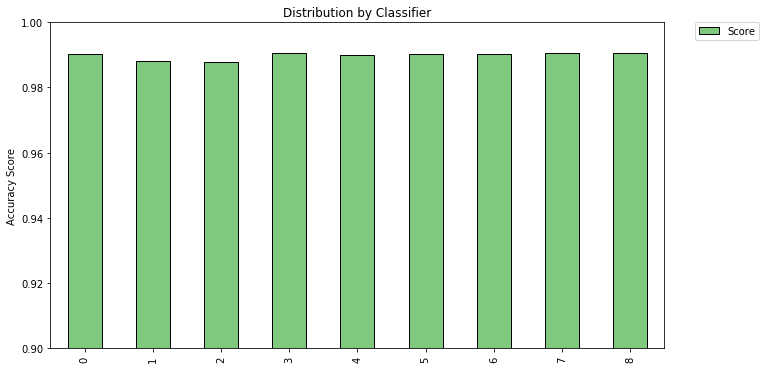

In [24]:
score.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Looks like ensemble classifiers are not doing as good as expected.

### Stemmer

It is said that stemming short messages does no goot or even harm predictions. Let's try this out.

Define our stemmer function

In [ ]:
# 현재 오픈문항이 단답형이기 때문에 어간추출 생략함

In [27]:
# def stemmer (text):
#     text = text.split()
#     words = ""
#     for i in text:
#             stemmer = SnowballStemmer("Korean")
#             words += (stemmer.stem(i))+" "
#     return words

In [28]:
# text_feat = text_feat.apply(stemmer)

ValueError: The language 'Korean' is not supported.

In [ ]:
#대신 벡터라이즈를 수정
# CountVectorizer() : 
# 가장 단순한 특징으로, 텍스트에서 단위별 등장횟수를 카운팅하여 수치벡터화
# 특별한 의미를 지니지 않는데 자주 사용되는 단어가 높은 가중을 가질 수 있음

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer(min_df=1)

In [26]:
features = vectorizer2.fit_transform(text_feat)

In [27]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.3, random_state=111)

In [28]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [29]:
# df2 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score2'])
score2 = pd.DataFrame.from_dict(dict(pred_scores),orient='index', columns=['Score2'])
score = pd.concat([score,score2],axis=1)
score

,Score,Score2
SVC,0.990207,0.990207
KN,0.988176,0.989848
NB,0.987937,0.986146
DT,0.990445,0.990207
LR,0.989968,0.990207
RF,0.990207,0.990087
AdaBoost,0.990207,0.990207
BgC,0.990445,0.990087
ETC,0.990445,0.990087


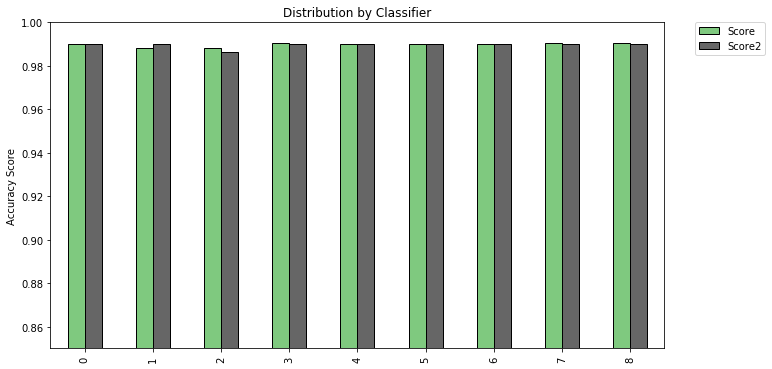

In [30]:
score.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [31]:
#보통 2개를 분류하는 케이스에서는 활성화함수를 'relu'씀.


import keras
from keras.layers import Dense
from keras.models import Sequential

#모델구성
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = features_train.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               170600    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 177,196
Trainable params: 177,196
Non-trainable params: 0
_________________________________________________________________


In [40]:
#모델훈련
model.fit(features_train,labels_train , epochs = 5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
19534/19534 [==============================] - 4s 199us/step - loss: 0.1024 - acc: 0.9858
Epoch 2/5
19534/19534 [==============================] - 3s 159us/step - loss: 0.0192 - acc: 0.9917
Epoch 3/5
19534/19534 [==============================] - 3s 158us/step - loss: 0.0098 - acc: 0.9969
Epoch 4/5
19534/19534 [==============================] - 3s 160us/step - loss: 0.0085 - acc: 0.9966
Epoch 5/5
19534/19534 [==============================] - 3s 167us/step - loss: 0.0085 - acc: 0.9966


In [41]:
pred = model.predict(features_test)

In [42]:
print(accuracy_score(labels_test,pred.round()))

0.9902066165054342


Looks like mostly the same . Ensemble classifiers doing a little bit better, NB still got the lead.

### What have we forgotten? Message length!

Let's append our message length feature to the matrix we fit into our classifiers

In [43]:
# 오류 : as_matrix()
# lf = sms['length'].as_matrix()
lf =df['length'].values
newfeat = np.hstack((features.todense(),lf[:, None]))

In [44]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, df['label'], test_size=0.3, random_state=111)

In [45]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [66]:
# df3 = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score3'])
score3 = pd.DataFrame.from_dict(dict(pred_scores),orient='index', columns=['Score3'])
score = pd.concat([score,score3],axis=1)
score

,Score,Score2,Score3
SVC,0.990207,0.990207,0.989490
KN,0.988176,0.989848,0.986385
NB,0.987937,0.986146,0.986743
DT,0.990445,0.990207,0.987221
LR,0.990207,0.989968,0.989848
RF,0.990207,0.990087,0.987340
AdaBoost,0.990207,0.990207,0.990207
BgC,0.990445,0.990087,0.986504
ETC,0.990445,0.990087,0.987340


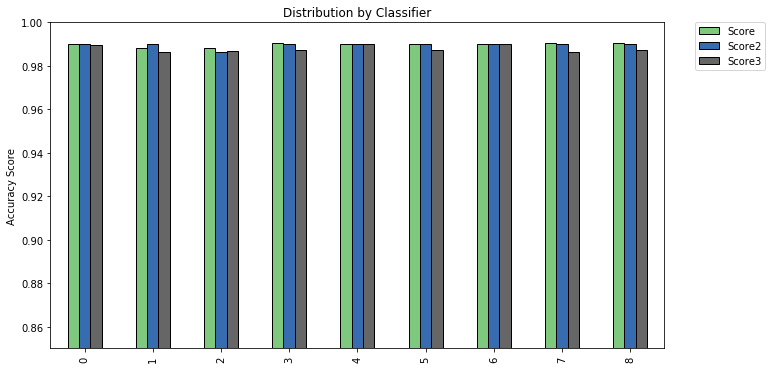

In [67]:
score.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

This time everyone are doing a little bit worse, except for LinearRegression and RandomForest. But the winner is still MultinominalNaiveBayes.

### Voting classifier

We are using ensemble algorithms here, but what about ensemble of ensembles? Will it beat NB?

In [68]:
from sklearn.ensemble import VotingClassifier

In [69]:
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [70]:
eclf.fit(features_train,labels_train)

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0, n_estimators=9,
                                                n_jobs=None, oob_score=False,
                                                random_state=111, verbose=0,
                                                warm_start=False)),
                             ('ETC',
                              ExtraTreesClassifier(bootstrap=False,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',...


In [71]:
pred = eclf.predict(features_test)

In [72]:
print(accuracy_score(labels_test,pred))

0.9873402603606831


In [75]:
#모델 저장
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pickle
from sklearn.externals import joblib


#GBoost 자리에 최적 모델쓰면돼요
with open('filename11.pkl', 'wb') as file:  
    pickle.dump(GBoost, file)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['filename1.pkl']

In [ ]:
#데이터에 적용하기

In [76]:
df= pd.read_excel('Google_sample2.xlsx',usecols='A,EU,EV',index=False)
df.head()

,Respondent.Serial,C1[1].slice,True_False
0,293,test,0
1,425,qprm,0
2,499,qwert,0
3,760,fgfghfg,0
4,1378,pubg,0


In [77]:
df.columns =['ID','C1','label']
text_feat = df['C1'].copy()
features = vectorizer.fit_transform(text_feat)

In [1]:
df_test = pd.read_excel('data/testdata_google_2011_11.xlsm',usecols='B,C')
df_test = get_preprocessed_df(df_test)

X_train,y_train =  vectorize_tfid_fit(df_copy)

NameError: name 'pd' is not defined

In [ ]:


#엑셀 저장
df_test2.to_excel('google_result_20201213.xlsx',sheet_name='result')